# Rice_Prediction_CNN_ELU

## Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.layers import ELU
from tensorflow.keras.callbacks import EarlyStopping
import splitfolders

## Split_Folder

In [18]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Rice_Image_Dataset'
output_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img'

In [19]:
#splitfolders.fixed(input=input_dir,output=output_dir,fixed=(500,100,100),seed=1337)

## Data Preparation

In [20]:
dataGen=ImageDataGenerator(rescale=1/255)

In [21]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Rice_Prediction\\Data_set\\Split_img\\val'

In [22]:
train_itt=dataGen.flow_from_directory(directory=train_dir,batch_size=64,target_size=(100,100))
test_itt=dataGen.flow_from_directory(directory=test_dir,batch_size=64,target_size=(100,100))
val_itt=dataGen.flow_from_directory(directory=val_dir,batch_size=64,target_size=(100,100))

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Model

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,(3,3),activation=ELU(),input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation=ELU()))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation=ELU()))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation=ELU()))
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
early_stop= EarlyStopping(monitor='val_loss',patience=3,mode='min',verbose=False)

In [26]:
model.fit(train_itt,validation_data=val_itt,epochs=50,callbacks=early_stop)

Epoch 1/50
40/40 [==============================] - 44s 1s/step - loss: 0.6395 - accuracy: 0.7932 - val_loss: 0.4384 - val_accuracy: 0.8500
Epoch 2/50
40/40 [==============================] - 43s 1s/step - loss: 0.2152 - accuracy: 0.9248 - val_loss: 0.1379 - val_accuracy: 0.9640
Epoch 3/50
40/40 [==============================] - 43s 1s/step - loss: 0.1077 - accuracy: 0.9652 - val_loss: 0.1379 - val_accuracy: 0.9500
Epoch 4/50
40/40 [==============================] - 42s 1s/step - loss: 0.0859 - accuracy: 0.9676 - val_loss: 0.1338 - val_accuracy: 0.9520
Epoch 5/50
40/40 [==============================] - 43s 1s/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 6/50
40/40 [==============================] - 47s 1s/step - loss: 0.0958 - accuracy: 0.9688 - val_loss: 0.1426 - val_accuracy: 0.9480
Epoch 7/50
40/40 [==============================] - 53s 1s/step - loss: 0.0658 - accuracy: 0.9772 - val_loss: 0.1364 - val_accuracy: 0.9560
Epoch 8/50
40/40 [==

In [32]:
model.evaluate(test_itt)

8/8 [==============================] - 8s 1s/step - loss: 0.0803 - accuracy: 0.9700


[0.08030171692371368, 0.9700000286102295]

<AxesSubplot:>

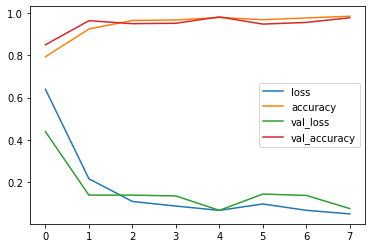

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

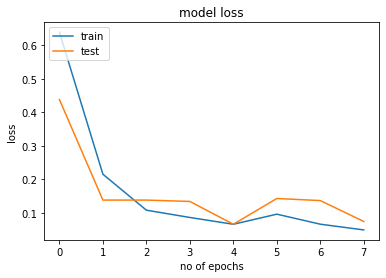

In [28]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

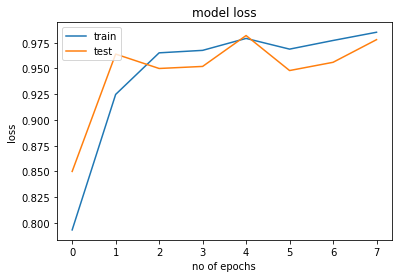

In [29]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [30]:
model.save('weather_classification_model.h5')

In [31]:
class_label= test_itt.class_indices
class_label

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}